In [1]:
import pandas as pd
import os

# Create an empty dataframe
data = pd.DataFrame(columns=['image_path', 'label'])

# Define the labels/classes
labels = {'C:\\Users\\imane\\OneDrive\\Bureau\\DL\\archive\\data\\cloudy' : 'Cloudy',
          'C:\\Users\\imane\\OneDrive\\Bureau\\DL\\archive\\data\\desert' : 'Desert',
          'C:\\Users\\imane\\OneDrive\\Bureau\\DL\\archive\\data\\green_area' : 'Green_Area',
          'C:\\Users\\imane\\OneDrive\\Bureau\\DL\\archive\\data\\water' : 'Water',
           }

In [2]:
# Créer un DataFrame vide
data = pd.DataFrame(columns=['image_path', 'label'])

# Votre boucle pour ajouter des données au DataFrame
for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        data = pd.concat([data, pd.DataFrame({'image_path': [image_path], 'label': [label]})], ignore_index=True)


In [3]:
data.to_csv('image_dataset.csv', index=False)

In [4]:
df = pd.read_csv("image_dataset.csv")

In [5]:
df.head()

,image_path,label
0,C:\Users\imane\OneDrive\Bureau\DL\archive\data...,Cloudy
1,C:\Users\imane\OneDrive\Bureau\DL\archive\data...,Cloudy
2,C:\Users\imane\OneDrive\Bureau\DL\archive\data...,Cloudy
3,C:\Users\imane\OneDrive\Bureau\DL\archive\data...,Cloudy
4,C:\Users\imane\OneDrive\Bureau\DL\archive\data...,Cloudy


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [7]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
# Prétraitement des données d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Mise à l'échelle des valeurs de pixels pour normaliser entre 0 et 1
    shear_range=0.2,  # Intensité de la déformation en cisaillement
    zoom_range=0.2,  # Intensité du zoom
    horizontal_flip=True,  # Retournement horizontal aléatoire
    rotation_range=45,  # Plage de rotation aléatoire
    vertical_flip=True,  # Retournement vertical aléatoire
    fill_mode='nearest'  # Mode de remplissage pour les transformations
)
# Prétraitement des données de test
test_datagen = ImageDataGenerator(
    rescale=1./255  # Mise à l'échelle des valeurs de pixels pour normaliser entre 0 et 1
)
# Génération de lots de données d'entraînement à partir d'un DataFrame
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,  # DataFrame contenant les chemins des images et les étiquettes
    x_col="image_path",  # Colonne contenant les chemins des images
    y_col="label",  # Colonne contenant les étiquettes
    target_size=(255, 255),  # Taille cible des images
    batch_size=32,  # Taille des lots
    class_mode="categorical"  # Mode de classification catégorielle
)
# Génération de lots de données de test à partir d'un DataFrame
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,  # DataFrame contenant les chemins des images et les étiquettes
    x_col="image_path",  # Colonne contenant les chemins des images
    y_col="label",  # Colonne contenant les étiquettes
    target_size=(255, 255),  # Taille cible des images
    batch_size=32,  # Taille des lots
    class_mode="categorical"  # Mode de classification catégorielle
)

Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


In [9]:
# Build a deep learning model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit_generator(train_generator, epochs=5, validation_data=test_generator)

C:\Users\imane\AppData\Local\Temp\ipykernel_8744\1344171112.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=5, validation_data=test_generator)


Epoch 1/5


141/141 [==============================] - 295s 2s/step - loss: 0.5715 - accuracy: 0.7458 - val_loss: 0.4118 - val_accuracy: 0.8412
Epoch 2/5
141/141 [==============================] - 294s 2s/step - loss: 0.4367 - accuracy: 0.8248 - val_loss: 0.3626 - val_accuracy: 0.8350
Epoch 3/5
141/141 [==============================] - 290s 2s/step - loss: 0.3641 - accuracy: 0.8566 - val_loss: 0.3206 - val_accuracy: 0.8580
Epoch 4/5
141/141 [==============================] - 291s 2s/step - loss: 0.3958 - accuracy: 0.8415 - val_loss: 0.4723 - val_accuracy: 0.7516
Epoch 5/5
141/141 [==============================] - 289s 2s/step - loss: 0.3779 - accuracy: 0.8572 - val_loss: 0.3171 - val_accuracy: 0.8660


In [12]:
num_samples = test_df.shape[0]
num_samples

1127

In [13]:
score = model.evaluate(test_generator,
                       steps=num_samples//32+1,
                       )

36/36 [==============================] - 23s 632ms/step - loss: 0.3171 - accuracy: 0.8660


In [14]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x00000137C53C4890>>

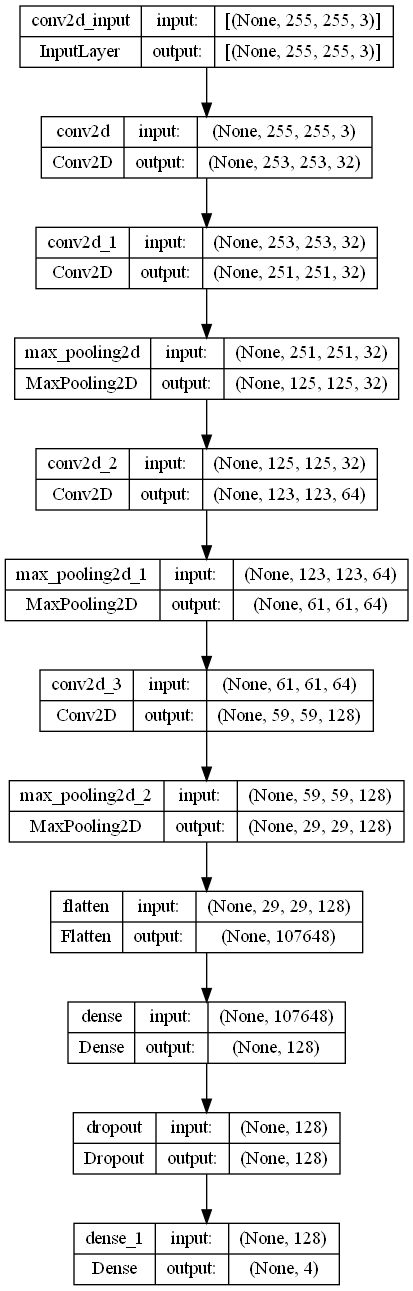

In [15]:
from tensorflow.keras.utils import plot_model
from PIL import Image

plot_model(model, to_file='C:\\Users\\imane\\OneDrive\\Bureau\\DL\\cnn_model.png', show_shapes=True, show_layer_names=True)
display(Image.open('C:\\Users\\imane\\OneDrive\\Bureau\\DL\\cnn_model.png'))

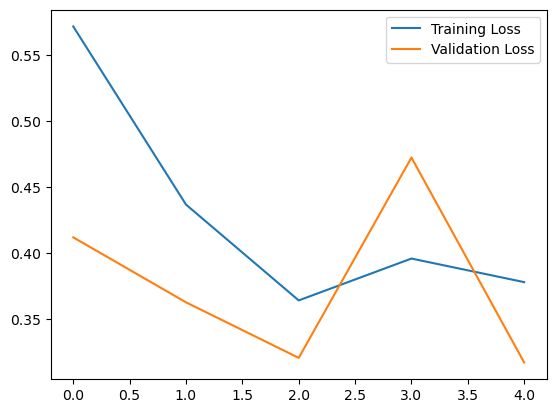

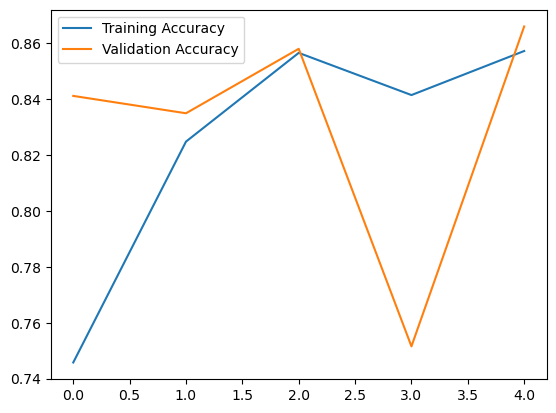

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('Model.h5')

C:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# Load the model
model = load_model("Model.h5")

In [19]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

In [20]:
# Load an image from the test set
img = load_img("C:\\Users\\imane\\OneDrive\\Bureau\\DL\\archive\\data\\green_area\\Forest_1768.jpg", target_size=(255, 255))

In [21]:
# Convert the image to an array
img_array = img_to_array(img)
img_array

array([[[32., 61., 67.],
        [32., 61., 67.],
        [32., 61., 67.],
        ...,
        [40., 64., 74.],
        [40., 64., 74.],
        [40., 64., 74.]],

       [[32., 61., 67.],
        [32., 61., 67.],
        [32., 61., 67.],
        ...,
        [40., 64., 74.],
        [40., 64., 74.],
        [40., 64., 74.]],

       [[32., 61., 67.],
        [32., 61., 67.],
        [32., 61., 67.],
        ...,
        [40., 64., 74.],
        [40., 64., 74.],
        [40., 64., 74.]],

       ...,

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]]

In [22]:
img_array.shape

(255, 255, 3)

In [23]:
# Normalize the image pixel values to the range [0, 1]
img_array = img_array / 255.0
img_array

array([[[0.1254902 , 0.23921569, 0.2627451 ],
        [0.1254902 , 0.23921569, 0.2627451 ],
        [0.1254902 , 0.23921569, 0.2627451 ],
        ...,
        [0.15686275, 0.2509804 , 0.2901961 ],
        [0.15686275, 0.2509804 , 0.2901961 ],
        [0.15686275, 0.2509804 , 0.2901961 ]],

       [[0.1254902 , 0.23921569, 0.2627451 ],
        [0.1254902 , 0.23921569, 0.2627451 ],
        [0.1254902 , 0.23921569, 0.2627451 ],
        ...,
        [0.15686275, 0.2509804 , 0.2901961 ],
        [0.15686275, 0.2509804 , 0.2901961 ],
        [0.15686275, 0.2509804 , 0.2901961 ]],

       [[0.1254902 , 0.23921569, 0.2627451 ],
        [0.1254902 , 0.23921569, 0.2627451 ],
        [0.1254902 , 0.23921569, 0.2627451 ],
        ...,
        [0.15686275, 0.2509804 , 0.2901961 ],
        [0.15686275, 0.2509804 , 0.2901961 ],
        [0.15686275, 0.2509804 , 0.2901961 ]],

       ...,

       [[0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0

In [24]:
import numpy as np
img_array = np.reshape(img_array, (1, 255, 255, 3))

In [25]:
# Get the model predictions
predictions = model.predict(img_array)

1/1 [==============================] - 0s 409ms/step


In [26]:
# Get the class index with the highest predicted probability
class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_label = class_names[class_index]

print("The image is predicted to be '{}'.".format(predicted_label))

The image is predicted to be 'Green_Area'.


In [27]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [28]:
predictions = model.predict_generator(test_generator)

C:\Users\imane\AppData\Local\Temp\ipykernel_8744\2745777454.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


In [29]:
predictions

array([[3.2895412e-02, 9.6710455e-01, 8.4130396e-14, 4.9569715e-10],
       [8.2196331e-01, 1.7797889e-01, 1.2087136e-08, 5.7823614e-05],
       [6.4859277e-01, 3.5139382e-01, 4.6758450e-09, 1.3510764e-05],
       ...,
       [1.5684128e-01, 8.4315372e-01, 3.2085882e-08, 4.8839638e-06],
       [1.8139617e-04, 1.0282000e-06, 1.7972801e-02, 9.8184478e-01],
       [1.1894992e-02, 9.8810494e-01, 3.8631307e-17, 2.1149215e-12]],
      dtype=float32)

In [30]:
actual_labels = test_generator.classes

In [31]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([1, 0, 0, ..., 1, 3, 1], dtype=int64)

In [32]:
cm = confusion_matrix(actual_labels, predicted_labels)

In [33]:
print(cm)

[[ 86  71 107  64]
 [ 58  59  76  34]
 [ 81  59  97  47]
 [ 73  65  98  52]]


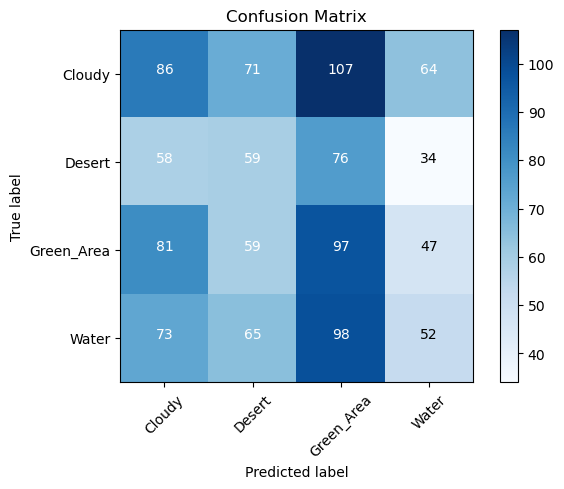

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Confusion matrix


# Plot the confusion matrix as an image
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add the class labels to the plot
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add values to the plot
threshold = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()